# Prediction Diabetes

## Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Load and review data

In [2]:
df = pd.read_csv('./data/pima-data.csv')

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Check for null values

In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) ## Blue to Yellow    0 to 1
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

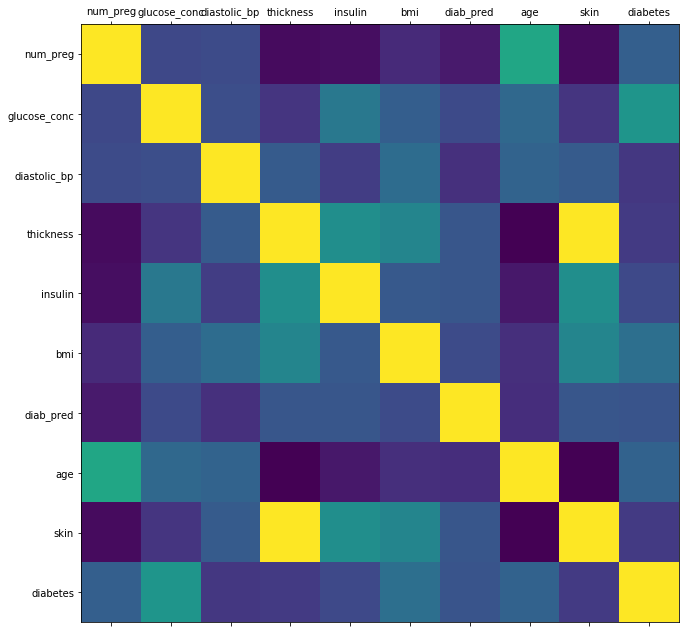

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
del df['skin']

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


### Check Data Types

In [12]:
diabetes_map = {True: 1, False: 0}

In [13]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check True/False ratio

In [15]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print ("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print ("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false))*100))

Number of True Cases: 268 (34.90%)
Number of False Cases: 500 (65.10%)


#### Good distribution of true and false cases. No special work needed.

### Spliting the data

70% for training, 30% for testing

In [16]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_name = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_name].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

C:\Users\r529811\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Post-split Data Preparation

#### Hidden Missing Values

In [17]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values valid?

How many rows have unexpected 0 values?

In [18]:
print("# rows in dataframe {0}".format(len(df)))
for col in feature_col_names:
    print("# rows in " + col + ": {0}".format(len(df.loc[df[col] == 0])))

# rows in dataframe 768
# rows in num_preg: 111
# rows in glucose_conc: 5
# rows in diastolic_bp: 35
# rows in thickness: 227
# rows in insulin: 374
# rows in bmi: 11
# rows in diab_pred: 0
# rows in age: 0


#### Impute with the mean

In [19]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

## Performance on Training Data

In [21]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7542


## Performance on Testing Data

In [22]:
# predict values using the training data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7359


### Metrics

In [23]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



## Training Second Algorithm - Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

### Predict Training Data

In [25]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


### Predict Test Data

In [26]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7100


In [27]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

Confusion Matrix
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



## Training 3rd Algorithm: Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

# C as regularization hyperparameter
lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

def display_metrics(y, y_pred):
    print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y, y_pred)))
    print("")
    print("Confusion Matrix")
    print(metrics.confusion_matrix(y, y_pred, labels=[1,0]))
    print("")
    print("Classification Report")
    print(metrics.classification_report(y, y_pred, labels=[1,0]))
    
# metrics
display_metrics(y_test, lr_predict_test)

Accuracy: 0.7446

Confusion Matrix
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



#### Setting regularization parameter

In [ ]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occurred at C={1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")
        
        
        

#### Logisitic regression with class_weight = 'balanced'

1st max value of 0.738 occurred at C=0.300


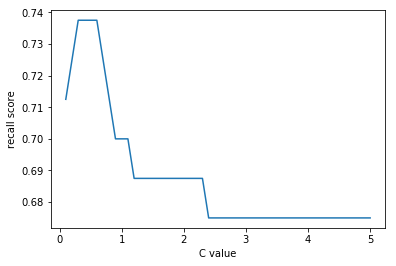

In [30]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight='balanced', random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occurred at C={1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [31]:
lr_model = LogisticRegression(C=best_score_C_val, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_model_test = lr_model.predict(X_test)
display_metrics(y_test, lr_model_test)

Accuracy: 0.7143

Confusion Matrix
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



### LogisticRegressionCV

In [34]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=10, cv=10, refit=True, class_weight='balanced')
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [35]:
lr_cv_model_test = lr_cv_model.predict(X_test)
display_metrics(y_test, lr_cv_model_test)

Accuracy: 0.6840

Confusion Matrix
[[ 51  29]
 [ 44 107]]

Classification Report
             precision    recall  f1-score   support

          1       0.54      0.64      0.58        80
          0       0.79      0.71      0.75       151

avg / total       0.70      0.68      0.69       231



## Training 4th Algorithm: K Nearest Neighbours

In [42]:
from sklearn.neighbors import KNeighborsClassifierCV
knn_model = KNeighborsClassifierCV()
knn_model.fit(X_train, y_train.ravel())

ImportError: cannot import name 'KNeighborsClassifierCV'

In [41]:
knn_model_test = knn_model.predict(X_test)
display_metrics(y_test, knn_model_test)

Accuracy: 0.6797

Confusion Matrix
[[ 47  33]
 [ 41 110]]

Classification Report
             precision    recall  f1-score   support

          1       0.53      0.59      0.56        80
          0       0.77      0.73      0.75       151

avg / total       0.69      0.68      0.68       231



## Training 5th Algorithm: Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [58]:
tree_model_test = tree_model.predict(X_test)
display_metrics(y_test, tree_model_test)

Accuracy: 0.7143

Confusion Matrix
[[ 52  28]
 [ 38 113]]

Classification Report
             precision    recall  f1-score   support

          1       0.58      0.65      0.61        80
          0       0.80      0.75      0.77       151

avg / total       0.72      0.71      0.72       231



## Training 6th Algorithm: SVM

In [61]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(C=0.2, class_weight='balanced',random_state=42)
svm_model.fit(X_train, y_train.ravel())

LinearSVC(C=0.2, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [62]:
svm_model_test = svm_model.predict(X_test)
display_metrics(y_test, svm_model_test)

Accuracy: 0.6450

Confusion Matrix
[[  1  79]
 [  3 148]]

Classification Report
             precision    recall  f1-score   support

          1       0.25      0.01      0.02        80
          0       0.65      0.98      0.78       151

avg / total       0.51      0.65      0.52       231

